<a href="https://colab.research.google.com/github/shauryaDugar/media-bias-detection/blob/main/Gender_Bias_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gender Bias Detection in Media Content by Fine Tuning Pre-Trained Transformers

---

This colab notebook contains code to fine tune 5 Pre-trained Transformer models on a gender bias sequence classification task. The dataset has been taken from mbib-full's dataset [gender-bias.csv](https://huggingface.co/datasets/mediabiasgroup/mbib-base/tree/main/mbib-aggregated)

The 5 Pre-trained Transformers used in this notebook are:


1.   XLNet
2.   ELECTRA
3.   RoBERTa
4.   BERT
5.   GPT-2

The performance of the 5 models is evaluated and compared on a test set created using a subset of the original dataset.







Installing datasets Python package

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.2 MB/s eta 0:00:00


Importing all the required libraries

In [ ]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification, pipeline, TFGPT2ForSequenceClassification
import tensorflow as tf
from datasets import Dataset, load_dataset
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Upload the gender-bias.csv to session storage in colab and then run the next cell to load and preview the dataset.

In [ ]:
gender_bias_ds = pd.read_csv('/content/gender-bias.csv')
gender_bias_ds = gender_bias_ds.convert_dtypes()
print("Original Dataset: \n")
print(gender_bias_ds.head(5))
print("\n\nSimplified Dataset: \n")
simple_ds = gender_bias_ds[['text', 'label']]
print(simple_ds.head(5))
train_df, test_df = train_test_split(simple_ds, test_size=0.2, random_state=42)

train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

train_ds = Dataset.from_pandas(train_df)
test_ds = Dataset.from_pandas(test_df)

Original Dataset: 

         id                                               text  label  \
0  075-2318  so what youre saying is blacks are more likely...      0   
1  075-2930  dont forget that they think blacks are too stu...      0   
2  107-3192  There is no way I d be eating that entree it s...      0   
3  075-2850  doctor stranges girlfriend is not a nurse shes...      1   
4  106-1124  It is not how much you are paid that matters B...      0   

   dataset_id  
0          75  
1          75  
2         107  
3          75  
4         106  


Simplified Dataset: 

                                                text  label
0  so what youre saying is blacks are more likely...      0
1  dont forget that they think blacks are too stu...      0
2  There is no way I d be eating that entree it s...      0
3  doctor stranges girlfriend is not a nurse shes...      1
4  It is not how much you are paid that matters B...      0


In [ ]:
xlnet_tokenizer = AutoTokenizer.from_pretrained("xlnet-base-cased")
xlnet_model = TFAutoModelForSequenceClassification.from_pretrained("xlnet-base-cased")

electra_tokenizer = AutoTokenizer.from_pretrained("bhadresh-savani/electra-base-emotion")
electra_model = TFAutoModelForSequenceClassification.from_pretrained("bhadresh-savani/electra-base-emotion")

roberta_tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")
roberta_model = TFAutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")

bert_tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
bert_model = TFAutoModelForSequenceClassification.from_pretrained("bert-base-cased")

gpt2_tokenizer = AutoTokenizer.from_pretrained("microsoft/DialogRPT-updown")
gpt2_model = TFGPT2ForSequenceClassification.from_pretrained("microsoft/DialogRPT-updown", from_pt=True)


tokenizers_and_models = [('xlnet', xlnet_tokenizer, xlnet_model),
                         ('electra', electra_tokenizer, electra_model),
                         ('roberta', roberta_tokenizer, roberta_model),
                         ('bert', bert_tokenizer, bert_model),
                         ('gpt2', gpt2_tokenizer, gpt2_model)]

model_metrics_df = pd.DataFrame(columns = ['name', 'accuracy', 'f1-score', 'precision', 'recall'])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/565M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer TruncatedNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
Some layers from the model checkpoint at xlnet-base-cased were not used when initializing TFXLNetForSequenceClassification: ['lm_loss']
- This IS expected if you are initializing TFXLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertF

tokenizer_config.json:   0%|          | 0.00/336 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/135M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFElectraForSequenceClassification.

All the layers of TFElectraForSequenceClassification were initialized from the model checkpoint at bhadresh-savani/electra-base-emotion.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFElectraForSequenceClassification for predictions without further training.


config.json:   0%|          | 0.00/768 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/501M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-emotion.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


config.json:   0%|          | 0.00/812 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/31.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFGPT2ForSequenceClassification.

All the weights of TFGPT2ForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2ForSequenceClassification for predictions without further training.


In [ ]:
def plot_training_curves(name, history):
  acc = history.history['accuracy']
  # val_acc = history.history['val_acc']
  loss = history.history['loss']
  # val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc, 'bo', label='Training acc')
  # plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training accuracy - '+name)
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  # plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training loss - '+name)
  plt.legend()

  plt.show()

def plot_confusion_matrix_and_show_metrics(true_labels, pred_labels, name):
  metrics = [metrics.accuracy_score(true_labels, pred_labels),
                        metrics.f1_score(true_labels, pred_labels),
                        metrics.precision_score(true_labels, pred_labels),
                        metrics.recall_score(true_labels, pred_labels)]
  print(f"{name} accuracy: {metrics[0]}\n{name} f1-score: {metrics[1]}\n{name} precision: {metrics[2]}\n{name} recall: {metrics[3]}")
  cm = metrics.confusion_matrix(true_labels, pred_labels)
  # Define labels
  labels = ['0', '1']

  # Plot confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix - '+name)
  plt.show()
  return metrics


In [ ]:
def train_and_evaluate(name, model, tokenizer):

  def tokenize_dataset(data):
      return tokenizer(data['text'])

  trainer_ds = train_ds.map(tokenize_dataset)
  tester_ds = test_ds.map(tokenize_dataset)

  tf_train_dataset = model.prepare_tf_dataset(trainer_ds, batch_size=32, shuffle=True, tokenizer=tokenizer)
  tf_test_dataset = model.prepare_tf_dataset(tester_ds, batch_size=32, shuffle=False, tokenizer=tokenizer)

  print(model.summary())
  model.compile(optimizer=tf.keras.optimizers.Adam(3e-5), metrics=['accuracy'])  # No loss argument!

  history = model.fit(tf_train_dataset, epochs=1)
  plot_training_curves(name, history)
  model.evaluate(tf_test_dataset)
  logits = model.predict(tf_test_dataset).logits
  predicted_class_id = tf.math.argmax(logits, axis=-1)
  metrics = plot_confusion_matrix_and_show_metrics(test_df['label'], predicted_class_id.numpy(), name)
  model_metrics_df.loc[len(model_metrics_df.index)] = [name, metrics[0], metrics[1], metrics[2], metrics[3]]

Map:   0%|          | 0/14352 [00:00<?, ? examples/s]

Map:   0%|          | 0/3588 [00:00<?, ? examples/s]

You're using a XLNetTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Model: "tfxl_net_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 transformer (TFXLNetMainLa  multiple                  116718336 
 yer)                                                            
                                                                 
 sequence_summary (TFSequen  multiple                  590592    
 ceSummary)                                                      
                                                                 
 logits_proj (Dense)         multiple                  1538      
                                                                 
Total params: 117310466 (447.50 MB)
Trainable params: 117310466 (447.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


448/448 [==============================] - 192s 327ms/step - loss: 0.4465 - accuracy: 0.7827


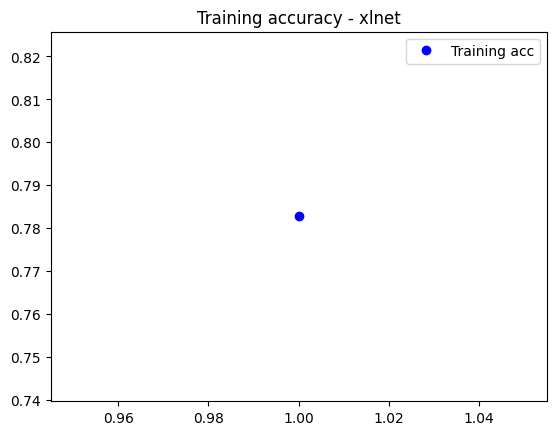

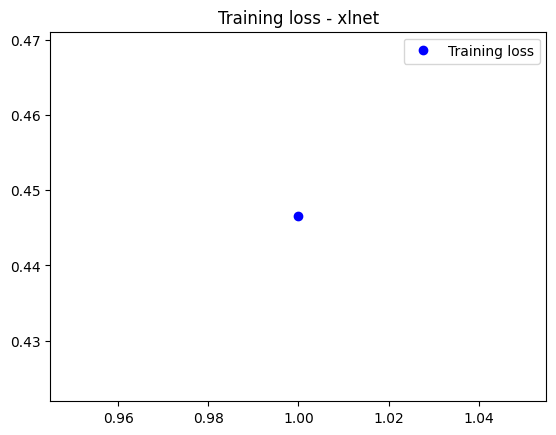

113/113 [==============================] - 16s 113ms/step


In [ ]:
for (name, tokenizer, model) in tokenizers_and_models:
  train_and_evaluate(name, model, tokenizer)

In [ ]:
print(model_metrics_df)
model_metrics_df.to_csv()